In [1]:
import pandas as pd

from unidecode import unidecode

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

from math import sqrt

from matplotlib import pyplot as plt

import seaborn as sns
sns.set()

In [2]:
# Coleta
dados = pd.read_csv("ocupacaoLeitoRJ.csv")
dados2 = pd.read_csv("dadosVacinaRJ.csv")
dados3 = pd.read_csv('populacaoRJ2020.csv',sep=';',usecols=['Município [-]','População estimada - pessoas [2020]','Densidade demográfica - hab/km² [2010]','IDHM <span>Índice de desenvolvimento humano municipal</span> [2010]','PIB per capita - R$ [2018]'])

In [3]:
dados.head()

,dataNotificacao,municipioNotificacao,totalUti,totalObitos
0,2020-01-01,RIO DE JANEIRO,12,0
1,2020-01-02,BOM JESUS DO ITABAPOANA,45,2
2,2020-01-02,RIO CLARO,4,0
3,2020-01-02,RIO DE JANEIRO,13,1
4,2020-01-03,CAMPOS DOS GOYTACAZES,33,0


In [4]:
dados2.head()

,vacina_dataaplicacao,estab_municipio,1dose,2dose,doseU
0,2021-01-17,BELFORD ROXO,2,0,0
1,2021-01-17,COMENDADOR LEVY GASPARIAN,0,1,0
2,2021-01-17,DUQUE DE CAXIAS,0,3,0
3,2021-01-17,MIGUEL PEREIRA,1,0,0
4,2021-01-17,RIO DE JANEIRO,5,14,0


In [5]:
dados3.head()

,Município [-],População estimada - pessoas [2020],Densidade demográfica - hab/km² [2010],IDHM <span>Índice de desenvolvimento humano municipal</span> [2010],PIB per capita - R$ [2018]
0,Angra dos Reis,207044,"205,45","0,724","44590,88"
1,Aperibé,11901,"107,92","0,692","15625,88"
2,Araruama,134293,"175,55","0,718","20480,15"
3,Areal,12669,"102,99","0,684","25200,29"
4,Armação dos Búzios,34477,"392,16","0,728","76723,42"


In [6]:
# TRATAMENTO ##################################################################################################################

In [7]:
dados.rename(columns={'municipioNotificacao':'municipio'}, inplace = True)
dados.dataNotificacao = pd.to_datetime(dados.dataNotificacao)
dados

,dataNotificacao,municipio,totalUti,totalObitos
0,2020-01-01,RIO DE JANEIRO,12,0
1,2020-01-02,BOM JESUS DO ITABAPOANA,45,2
2,2020-01-02,RIO CLARO,4,0
3,2020-01-02,RIO DE JANEIRO,13,1
4,2020-01-03,CAMPOS DOS GOYTACAZES,33,0
...,...,...,...,...
20662,2021-07-14,TERESOPOLIS,21,0
20663,2021-07-14,TRAJANO DE MORAES,0,0
20664,2021-07-14,TRES RIOS,30,0
20665,2021-07-14,VALENCA,33,0


In [8]:
# Criação de data projetando 14 dias antes
dados['data'] = dados['dataNotificacao'] -  pd.to_timedelta(14, unit='d')
dados

,dataNotificacao,municipio,totalUti,totalObitos,data
0,2020-01-01,RIO DE JANEIRO,12,0,2019-12-18
1,2020-01-02,BOM JESUS DO ITABAPOANA,45,2,2019-12-19
2,2020-01-02,RIO CLARO,4,0,2019-12-19
3,2020-01-02,RIO DE JANEIRO,13,1,2019-12-19
4,2020-01-03,CAMPOS DOS GOYTACAZES,33,0,2019-12-20
...,...,...,...,...,...
20662,2021-07-14,TERESOPOLIS,21,0,2021-06-30
20663,2021-07-14,TRAJANO DE MORAES,0,0,2021-06-30
20664,2021-07-14,TRES RIOS,30,0,2021-06-30
20665,2021-07-14,VALENCA,33,0,2021-06-30


In [9]:
dados2.rename(columns={'vacina_dataaplicacao': 'data','estab_municipio':'municipio'}, inplace = True)
dados2.data = pd.to_datetime(dados2.data)
dados2

,data,municipio,1dose,2dose,doseU
0,2021-01-17,BELFORD ROXO,2,0,0
1,2021-01-17,COMENDADOR LEVY GASPARIAN,0,1,0
2,2021-01-17,DUQUE DE CAXIAS,0,3,0
3,2021-01-17,MIGUEL PEREIRA,1,0,0
4,2021-01-17,RIO DE JANEIRO,5,14,0
...,...,...,...,...,...
11800,2021-07-13,SAO JOAO DE MERITI,423,6,0
11801,2021-07-13,SAO PEDRO DA ALDEIA,95,0,0
11802,2021-07-13,SEROPEDICA,40,0,0
11803,2021-07-13,SILVA JARDIM,0,0,129


In [10]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11805 entries, 0 to 11804
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   data       11805 non-null  datetime64[ns]
 1   municipio  11805 non-null  object        
 2   1dose      11805 non-null  int64         
 3   2dose      11805 non-null  int64         
 4   doseU      11805 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 461.3+ KB


In [11]:
dados3.rename(columns={'Município [-]':'municipio','População estimada - pessoas [2020]': 'populacao','Densidade demográfica - hab/km² [2010]':'densidadeDemo','IDHM <span>Índice de desenvolvimento humano municipal</span> [2010]':'IDHM','PIB per capita - R$ [2018]':'PIB'}, inplace = True)
dados3

,municipio,populacao,densidadeDemo,IDHM,PIB
0,Angra dos Reis,207044,"205,45","0,724","44590,88"
1,Aperibé,11901,"107,92","0,692","15625,88"
2,Araruama,134293,"175,55","0,718","20480,15"
3,Areal,12669,"102,99","0,684","25200,29"
4,Armação dos Búzios,34477,"392,16","0,728","76723,42"
...,...,...,...,...,...
87,Três Rios,82142,"237,42","0,725","48575,26"
88,Valença,76869,"55,06","0,738","33675,61"
89,Varre-Sai,11106,"49,85","0,659","17174,75"
90,Vassouras,37083,"63,94","0,714","26624,86"


In [12]:
dados3.municipio = [unidecode(s) for s in dados3['municipio']]
dados3.municipio = [unidecode(s) for s in dados3['municipio'].str.upper()]
dados3

,municipio,populacao,densidadeDemo,IDHM,PIB
0,ANGRA DOS REIS,207044,"205,45","0,724","44590,88"
1,APERIBE,11901,"107,92","0,692","15625,88"
2,ARARUAMA,134293,"175,55","0,718","20480,15"
3,AREAL,12669,"102,99","0,684","25200,29"
4,ARMACAO DOS BUZIOS,34477,"392,16","0,728","76723,42"
...,...,...,...,...,...
87,TRES RIOS,82142,"237,42","0,725","48575,26"
88,VALENCA,76869,"55,06","0,738","33675,61"
89,VARRE-SAI,11106,"49,85","0,659","17174,75"
90,VASSOURAS,37083,"63,94","0,714","26624,86"


In [13]:
dados3.isnull().any()

municipio        False
populacao        False
densidadeDemo    False
IDHM             False
PIB              False
dtype: bool

In [14]:
dados3.dtypes

municipio        object
populacao         int64
densidadeDemo    object
IDHM             object
PIB              object
dtype: object

In [15]:
dados3.densidadeDemo = dados3.densidadeDemo.apply(lambda x: float(str(x).replace(',','.')))
dados3.IDHM = dados3.IDHM.apply(lambda x: float(str(x).replace(',','.')))
dados3.PIB = dados3.PIB.apply(lambda x: float(str(x).replace(',','.')))

In [16]:
dados3.dtypes

municipio         object
populacao          int64
densidadeDemo    float64
IDHM             float64
PIB              float64
dtype: object

In [17]:
dfinal = pd.merge(dados, dados3, how = 'left', on = 'municipio')
dfinal

,dataNotificacao,municipio,totalUti,totalObitos,data,populacao,densidadeDemo,IDHM,PIB
0,2020-01-01,RIO DE JANEIRO,12,0,2019-12-18,6747815,5265.82,0.799,54426.08
1,2020-01-02,BOM JESUS DO ITABAPOANA,45,2,2019-12-19,37203,59.13,0.732,20586.07
2,2020-01-02,RIO CLARO,4,0,2019-12-19,18605,20.81,0.683,21763.04
3,2020-01-02,RIO DE JANEIRO,13,1,2019-12-19,6747815,5265.82,0.799,54426.08
4,2020-01-03,CAMPOS DOS GOYTACAZES,33,0,2019-12-20,511168,115.16,0.716,64186.76
...,...,...,...,...,...,...,...,...,...
20662,2021-07-14,TERESOPOLIS,21,0,2021-06-30,184240,212.49,0.730,28503.62
20663,2021-07-14,TRAJANO DE MORAES,0,0,2021-06-30,10640,17.44,0.667,18452.36
20664,2021-07-14,TRES RIOS,30,0,2021-06-30,82142,237.42,0.725,48575.26
20665,2021-07-14,VALENCA,33,0,2021-06-30,76869,55.06,0.738,33675.61


In [18]:
dfinal.isnull().any()

dataNotificacao    False
municipio          False
totalUti           False
totalObitos        False
data               False
populacao          False
densidadeDemo      False
IDHM               False
PIB                False
dtype: bool

In [19]:
dfinal.dtypes

dataNotificacao    datetime64[ns]
municipio                  object
totalUti                    int64
totalObitos                 int64
data               datetime64[ns]
populacao                   int64
densidadeDemo             float64
IDHM                      float64
PIB                       float64
dtype: object

In [20]:
# Cálculo percentual de notificações em relação à população
dfinal['totalUtiRel'] = dfinal['totalUti'] /dfinal['populacao']*100
dfinal['totalObitoRel'] = dfinal['totalObitos'] /dfinal['populacao']*100

dfinal

,dataNotificacao,municipio,totalUti,totalObitos,data,populacao,densidadeDemo,IDHM,PIB,totalUtiRel,totalObitoRel
0,2020-01-01,RIO DE JANEIRO,12,0,2019-12-18,6747815,5265.82,0.799,54426.08,0.000178,0.000000
1,2020-01-02,BOM JESUS DO ITABAPOANA,45,2,2019-12-19,37203,59.13,0.732,20586.07,0.120958,0.005376
2,2020-01-02,RIO CLARO,4,0,2019-12-19,18605,20.81,0.683,21763.04,0.021500,0.000000
3,2020-01-02,RIO DE JANEIRO,13,1,2019-12-19,6747815,5265.82,0.799,54426.08,0.000193,0.000015
4,2020-01-03,CAMPOS DOS GOYTACAZES,33,0,2019-12-20,511168,115.16,0.716,64186.76,0.006456,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
20662,2021-07-14,TERESOPOLIS,21,0,2021-06-30,184240,212.49,0.730,28503.62,0.011398,0.000000
20663,2021-07-14,TRAJANO DE MORAES,0,0,2021-06-30,10640,17.44,0.667,18452.36,0.000000,0.000000
20664,2021-07-14,TRES RIOS,30,0,2021-06-30,82142,237.42,0.725,48575.26,0.036522,0.000000
20665,2021-07-14,VALENCA,33,0,2021-06-30,76869,55.06,0.738,33675.61,0.042930,0.000000


In [21]:
# Cidades que mais notificaram ocupação de leitos de UTI, em percentual relativo à população
analise = dfinal
analise = analise.groupby(['municipio'])['totalUtiRel','totalObitoRel'].sum()
analise = analise.sort_values(by=['totalUtiRel'], ascending = False)
analise

C:\Users\ethie\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,totalUtiRel,totalObitoRel
municipio,,
VASSOURAS,88.533830,1.332147
BOM JESUS DO ITABAPOANA,36.693277,1.069806
PETROPOLIS,26.464892,0.415746
VALENCA,21.869674,0.278396
MIGUEL PEREIRA,20.781048,0.676283
...,...,...
PARACAMBI,0.001898,0.309398
DUAS BARRAS,0.000000,3.972935
MENDES,0.000000,0.005363


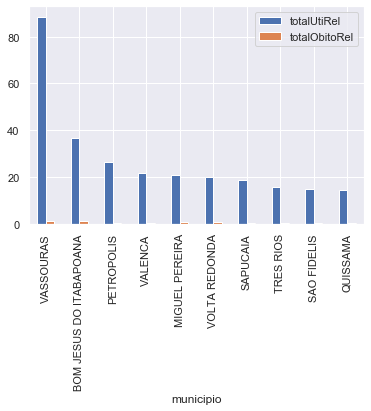

In [22]:
analise.head(10).plot(kind='bar')

In [23]:
# Cidades que mais notificaram óbitos, em percentual relativo à população
analise = dfinal
analise = analise.groupby(['municipio'])['totalUtiRel','totalObitoRel'].sum()
analise = analise.sort_values(by=['totalObitoRel'], ascending = False)
analise

C:\Users\ethie\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,totalUtiRel,totalObitoRel
municipio,,
DUAS BARRAS,0.000000,3.972935
VASSOURAS,88.533830,1.332147
BOM JESUS DO ITABAPOANA,36.693277,1.069806
VOLTA REDONDA,19.934450,0.709520
MIGUEL PEREIRA,20.781048,0.676283
...,...,...
ITAPERUNA,4.710983,0.015414
SANTO ANTONIO DE PADUA,0.002348,0.014086
MENDES,0.000000,0.005363


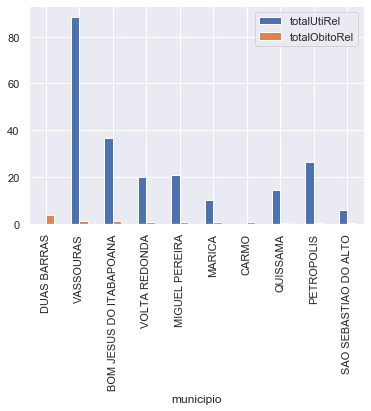

In [24]:
analise.head(10).plot(kind='bar')

In [25]:
dfinal = pd.merge(dfinal, dados2, how = 'left', on = ['municipio','data'])
dfinal

,dataNotificacao,municipio,totalUti,totalObitos,data,populacao,densidadeDemo,IDHM,PIB,totalUtiRel,totalObitoRel,1dose,2dose,doseU
0,2020-01-01,RIO DE JANEIRO,12,0,2019-12-18,6747815,5265.82,0.799,54426.08,0.000178,0.000000,NaN,NaN,NaN
1,2020-01-02,BOM JESUS DO ITABAPOANA,45,2,2019-12-19,37203,59.13,0.732,20586.07,0.120958,0.005376,NaN,NaN,NaN
2,2020-01-02,RIO CLARO,4,0,2019-12-19,18605,20.81,0.683,21763.04,0.021500,0.000000,NaN,NaN,NaN
3,2020-01-02,RIO DE JANEIRO,13,1,2019-12-19,6747815,5265.82,0.799,54426.08,0.000193,0.000015,NaN,NaN,NaN
4,2020-01-03,CAMPOS DOS GOYTACAZES,33,0,2019-12-20,511168,115.16,0.716,64186.76,0.006456,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20662,2021-07-14,TERESOPOLIS,21,0,2021-06-30,184240,212.49,0.730,28503.62,0.011398,0.000000,1.0,0.0,0.0
20663,2021-07-14,TRAJANO DE MORAES,0,0,2021-06-30,10640,17.44,0.667,18452.36,0.000000,0.000000,162.0,1.0,0.0
20664,2021-07-14,TRES RIOS,30,0,2021-06-30,82142,237.42,0.725,48575.26,0.036522,0.000000,1.0,0.0,0.0
20665,2021-07-14,VALENCA,33,0,2021-06-30,76869,55.06,0.738,33675.61,0.042930,0.000000,NaN,NaN,NaN


In [26]:
dfinal.isnull().sum()


dataNotificacao        0
municipio              0
totalUti               0
totalObitos            0
data                   0
populacao              0
densidadeDemo          0
IDHM                   0
PIB                    0
totalUtiRel            0
totalObitoRel          0
1dose              14713
2dose              14713
doseU              14713
dtype: int64

In [27]:
# Filtrando dados a partir da data de início da campanha de vacinação
dfinal.query('data >= "2021-01-17"', inplace=True)

dfinal

,dataNotificacao,municipio,totalUti,totalObitos,data,populacao,densidadeDemo,IDHM,PIB,totalUtiRel,totalObitoRel,1dose,2dose,doseU
13142,2021-01-31,ANGRA DOS REIS,43,0,2021-01-17,207044,205.45,0.724,44590.88,0.020769,0.000000,NaN,NaN,NaN
13143,2021-01-31,APERIBE,0,0,2021-01-17,11901,107.92,0.692,15625.88,0.000000,0.000000,NaN,NaN,NaN
13144,2021-01-31,ARARUAMA,14,0,2021-01-17,134293,175.55,0.718,20480.15,0.010425,0.000000,NaN,NaN,NaN
13145,2021-01-31,AREAL,0,0,2021-01-17,12669,102.99,0.684,25200.29,0.000000,0.000000,NaN,NaN,NaN
13146,2021-01-31,ARMACAO DOS BUZIOS,0,0,2021-01-17,34477,392.16,0.728,76723.42,0.000000,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20662,2021-07-14,TERESOPOLIS,21,0,2021-06-30,184240,212.49,0.730,28503.62,0.011398,0.000000,1.0,0.0,0.0
20663,2021-07-14,TRAJANO DE MORAES,0,0,2021-06-30,10640,17.44,0.667,18452.36,0.000000,0.000000,162.0,1.0,0.0
20664,2021-07-14,TRES RIOS,30,0,2021-06-30,82142,237.42,0.725,48575.26,0.036522,0.000000,1.0,0.0,0.0
20665,2021-07-14,VALENCA,33,0,2021-06-30,76869,55.06,0.738,33675.61,0.042930,0.000000,NaN,NaN,NaN


In [28]:
dose1 = dfinal
dose1 = dose1.loc[:, ['municipio', 'data', '1dose']]

In [29]:
dose1['1doseA'] = ''
dose1['1doseA'] = dose1.groupby(['municipio']).cumsum()
dose1 = dose1.sort_values(['data','municipio']).reset_index()
dose1 = dose1.drop(['index'],axis=1)
dose1

,municipio,data,1dose,1doseA
0,ANGRA DOS REIS,2021-01-17,NaN,NaN
1,APERIBE,2021-01-17,NaN,NaN
2,ARARUAMA,2021-01-17,NaN,NaN
3,AREAL,2021-01-17,NaN,NaN
4,ARMACAO DOS BUZIOS,2021-01-17,NaN,NaN
...,...,...,...,...
7520,TERESOPOLIS,2021-06-30,1.0,62008.0
7521,TRAJANO DE MORAES,2021-06-30,162.0,3397.0
7522,TRES RIOS,2021-06-30,1.0,25624.0
7523,VALENCA,2021-06-30,NaN,NaN


In [30]:
dose2 = dfinal
dose2 = dose2.loc[:, ['municipio', 'data', '2dose']]

In [31]:
dose2['2doseA'] = ''
dose2['2doseA'] = dose2.groupby(['municipio']).cumsum()
dose2 = dose2.sort_values(['data','municipio']).reset_index()
dose2 = dose2.drop(['index'],axis=1)
dose2

,municipio,data,2dose,2doseA
0,ANGRA DOS REIS,2021-01-17,NaN,NaN
1,APERIBE,2021-01-17,NaN,NaN
2,ARARUAMA,2021-01-17,NaN,NaN
3,AREAL,2021-01-17,NaN,NaN
4,ARMACAO DOS BUZIOS,2021-01-17,NaN,NaN
...,...,...,...,...
7520,TERESOPOLIS,2021-06-30,0.0,21143.0
7521,TRAJANO DE MORAES,2021-06-30,1.0,1019.0
7522,TRES RIOS,2021-06-30,0.0,10955.0
7523,VALENCA,2021-06-30,NaN,NaN


In [32]:
doseU = dfinal
doseU = doseU.loc[:, ['municipio', 'data', 'doseU']]

In [33]:
doseU['doseUA'] = ''
doseU['doseUA'] = doseU.groupby(['municipio']).cumsum()
doseU = doseU.sort_values(['data','municipio']).reset_index()
doseU = doseU.drop(['index'],axis=1)
doseU

,municipio,data,doseU,doseUA
0,ANGRA DOS REIS,2021-01-17,NaN,NaN
1,APERIBE,2021-01-17,NaN,NaN
2,ARARUAMA,2021-01-17,NaN,NaN
3,AREAL,2021-01-17,NaN,NaN
4,ARMACAO DOS BUZIOS,2021-01-17,NaN,NaN
...,...,...,...,...
7520,TERESOPOLIS,2021-06-30,0.0,724.0
7521,TRAJANO DE MORAES,2021-06-30,0.0,0.0
7522,TRES RIOS,2021-06-30,0.0,0.0
7523,VALENCA,2021-06-30,NaN,NaN


In [34]:
# Inserindo os dados acumulados de 1 dose
dfinal2 = pd.merge(dfinal, dose1, how = 'left', on = ['municipio','data','1dose'])
dfinal2

,dataNotificacao,municipio,totalUti,totalObitos,data,populacao,densidadeDemo,IDHM,PIB,totalUtiRel,totalObitoRel,1dose,2dose,doseU,1doseA
0,2021-01-31,ANGRA DOS REIS,43,0,2021-01-17,207044,205.45,0.724,44590.88,0.020769,0.000000,NaN,NaN,NaN,NaN
1,2021-01-31,APERIBE,0,0,2021-01-17,11901,107.92,0.692,15625.88,0.000000,0.000000,NaN,NaN,NaN,NaN
2,2021-01-31,ARARUAMA,14,0,2021-01-17,134293,175.55,0.718,20480.15,0.010425,0.000000,NaN,NaN,NaN,NaN
3,2021-01-31,AREAL,0,0,2021-01-17,12669,102.99,0.684,25200.29,0.000000,0.000000,NaN,NaN,NaN,NaN
4,2021-01-31,ARMACAO DOS BUZIOS,0,0,2021-01-17,34477,392.16,0.728,76723.42,0.000000,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,2021-07-14,TERESOPOLIS,21,0,2021-06-30,184240,212.49,0.730,28503.62,0.011398,0.000000,1.0,0.0,0.0,62008.0
7521,2021-07-14,TRAJANO DE MORAES,0,0,2021-06-30,10640,17.44,0.667,18452.36,0.000000,0.000000,162.0,1.0,0.0,3397.0
7522,2021-07-14,TRES RIOS,30,0,2021-06-30,82142,237.42,0.725,48575.26,0.036522,0.000000,1.0,0.0,0.0,25624.0
7523,2021-07-14,VALENCA,33,0,2021-06-30,76869,55.06,0.738,33675.61,0.042930,0.000000,NaN,NaN,NaN,NaN


In [35]:
# Inserindo os dados acumulados de 2 dose
dfinal2 = pd.merge(dfinal2, dose2, how = 'left', on = ['municipio','data','2dose'])
dfinal2

,dataNotificacao,municipio,totalUti,totalObitos,data,populacao,densidadeDemo,IDHM,PIB,totalUtiRel,totalObitoRel,1dose,2dose,doseU,1doseA,2doseA
0,2021-01-31,ANGRA DOS REIS,43,0,2021-01-17,207044,205.45,0.724,44590.88,0.020769,0.000000,NaN,NaN,NaN,NaN,NaN
1,2021-01-31,APERIBE,0,0,2021-01-17,11901,107.92,0.692,15625.88,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2,2021-01-31,ARARUAMA,14,0,2021-01-17,134293,175.55,0.718,20480.15,0.010425,0.000000,NaN,NaN,NaN,NaN,NaN
3,2021-01-31,AREAL,0,0,2021-01-17,12669,102.99,0.684,25200.29,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
4,2021-01-31,ARMACAO DOS BUZIOS,0,0,2021-01-17,34477,392.16,0.728,76723.42,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,2021-07-14,TERESOPOLIS,21,0,2021-06-30,184240,212.49,0.730,28503.62,0.011398,0.000000,1.0,0.0,0.0,62008.0,21143.0
7521,2021-07-14,TRAJANO DE MORAES,0,0,2021-06-30,10640,17.44,0.667,18452.36,0.000000,0.000000,162.0,1.0,0.0,3397.0,1019.0
7522,2021-07-14,TRES RIOS,30,0,2021-06-30,82142,237.42,0.725,48575.26,0.036522,0.000000,1.0,0.0,0.0,25624.0,10955.0
7523,2021-07-14,VALENCA,33,0,2021-06-30,76869,55.06,0.738,33675.61,0.042930,0.000000,NaN,NaN,NaN,NaN,NaN


In [36]:
# Inserindo os dados acumulados de dose única
dfinal2 = pd.merge(dfinal2, doseU, how = 'left', on = ['municipio','data','doseU'])
dfinal2

,dataNotificacao,municipio,totalUti,totalObitos,data,populacao,densidadeDemo,IDHM,PIB,totalUtiRel,totalObitoRel,1dose,2dose,doseU,1doseA,2doseA,doseUA
0,2021-01-31,ANGRA DOS REIS,43,0,2021-01-17,207044,205.45,0.724,44590.88,0.020769,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-31,APERIBE,0,0,2021-01-17,11901,107.92,0.692,15625.88,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-31,ARARUAMA,14,0,2021-01-17,134293,175.55,0.718,20480.15,0.010425,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-31,AREAL,0,0,2021-01-17,12669,102.99,0.684,25200.29,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-31,ARMACAO DOS BUZIOS,0,0,2021-01-17,34477,392.16,0.728,76723.42,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,2021-07-14,TERESOPOLIS,21,0,2021-06-30,184240,212.49,0.730,28503.62,0.011398,0.000000,1.0,0.0,0.0,62008.0,21143.0,724.0
7521,2021-07-14,TRAJANO DE MORAES,0,0,2021-06-30,10640,17.44,0.667,18452.36,0.000000,0.000000,162.0,1.0,0.0,3397.0,1019.0,0.0
7522,2021-07-14,TRES RIOS,30,0,2021-06-30,82142,237.42,0.725,48575.26,0.036522,0.000000,1.0,0.0,0.0,25624.0,10955.0,0.0
7523,2021-07-14,VALENCA,33,0,2021-06-30,76869,55.06,0.738,33675.61,0.042930,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Cálculo percentual de vacinas aplicadas em 1ª dose e total
dfinal2['1dose_rel'] = (dfinal2['1dose'] + dfinal2['doseU'])/dfinal2['populacao']*100
dfinal2['2dose_rel'] = (dfinal2['2dose'] + dfinal2['doseU'])/dfinal2['populacao']*100
dfinal2['1doseA_rel'] = (dfinal2['1doseA'] + dfinal2['doseUA'])/dfinal2['populacao']*100
dfinal2['2doseA_rel'] = (dfinal2['2doseA'] + dfinal2['doseUA'])/dfinal2['populacao']*100
dfinal2

,dataNotificacao,municipio,totalUti,totalObitos,data,populacao,densidadeDemo,IDHM,PIB,totalUtiRel,...,1dose,2dose,doseU,1doseA,2doseA,doseUA,1dose_rel,2dose_rel,1doseA_rel,2doseA_rel
0,2021-01-31,ANGRA DOS REIS,43,0,2021-01-17,207044,205.45,0.724,44590.88,0.020769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-31,APERIBE,0,0,2021-01-17,11901,107.92,0.692,15625.88,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-31,ARARUAMA,14,0,2021-01-17,134293,175.55,0.718,20480.15,0.010425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-31,AREAL,0,0,2021-01-17,12669,102.99,0.684,25200.29,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-31,ARMACAO DOS BUZIOS,0,0,2021-01-17,34477,392.16,0.728,76723.42,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,2021-07-14,TERESOPOLIS,21,0,2021-06-30,184240,212.49,0.730,28503.62,0.011398,...,1.0,0.0,0.0,62008.0,21143.0,724.0,0.000543,0.000000,34.049066,11.868758
7521,2021-07-14,TRAJANO DE MORAES,0,0,2021-06-30,10640,17.44,0.667,18452.36,0.000000,...,162.0,1.0,0.0,3397.0,1019.0,0.0,1.522556,0.009398,31.926692,9.577068
7522,2021-07-14,TRES RIOS,30,0,2021-06-30,82142,237.42,0.725,48575.26,0.036522,...,1.0,0.0,0.0,25624.0,10955.0,0.0,0.001217,0.000000,31.194760,13.336661
7523,2021-07-14,VALENCA,33,0,2021-06-30,76869,55.06,0.738,33675.61,0.042930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
dfinal2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7525 entries, 0 to 7524
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   dataNotificacao  7525 non-null   datetime64[ns]
 1   municipio        7525 non-null   object        
 2   totalUti         7525 non-null   int64         
 3   totalObitos      7525 non-null   int64         
 4   data             7525 non-null   datetime64[ns]
 5   populacao        7525 non-null   int64         
 6   densidadeDemo    7525 non-null   float64       
 7   IDHM             7525 non-null   float64       
 8   PIB              7525 non-null   float64       
 9   totalUtiRel      7525 non-null   float64       
 10  totalObitoRel    7525 non-null   float64       
 11  1dose            5954 non-null   float64       
 12  2dose            5954 non-null   float64       
 13  doseU            5954 non-null   float64       
 14  1doseA           5954 non-null   float64

In [39]:
analise = dfinal2
analise = analise.groupby(['municipio'])['totalUtiRel','totalObitoRel','1dose_rel','2dose_rel'].sum()
analise = analise.sort_values(by=['totalUtiRel'], ascending = False)
analise

C:\Users\ethie\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,totalUtiRel,totalObitoRel,1dose_rel,2dose_rel
municipio,,,,
VASSOURAS,46.638621,0.811693,23.776393,7.159615
BOM JESUS DO ITABAPOANA,15.189635,0.362874,25.602774,10.493777
PETROPOLIS,13.748948,0.253034,29.248593,10.021260
VOLTA REDONDA,13.437450,0.415347,43.163934,14.489686
MIGUEL PEREIRA,10.894805,0.422188,45.076424,14.244947
QUISSAMA,10.037411,0.282576,30.116214,13.054207
VALENCA,9.242998,0.152207,40.552108,14.868152
TRES RIOS,8.269825,0.140001,31.194760,13.336661
SAPUCAIA,7.967560,0.049318,37.892487,13.622664


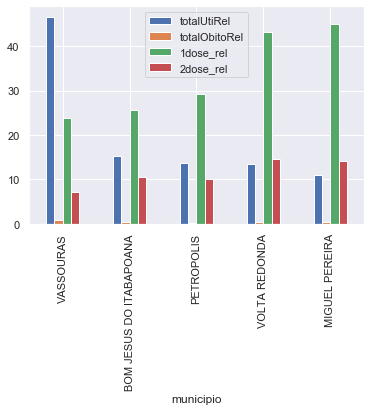

In [40]:
analise.head().plot(kind='bar')

In [41]:
analise = dfinal2
analise = analise.groupby(['municipio'])['totalUtiRel','totalObitoRel','1dose_rel','2dose_rel'].sum()
analise = analise.sort_values(by=['totalObitoRel'], ascending = False)
analise

C:\Users\ethie\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,totalUtiRel,totalObitoRel,1dose_rel,2dose_rel
municipio,,,,
VASSOURAS,46.638621,0.811693,23.776393,7.159615
MIGUEL PEREIRA,10.894805,0.422188,45.076424,14.244947
VOLTA REDONDA,13.437450,0.415347,43.163934,14.489686
MARICA,4.136070,0.372635,21.195229,8.448427
BOM JESUS DO ITABAPOANA,15.189635,0.362874,25.602774,10.493777
QUISSAMA,10.037411,0.282576,30.116214,13.054207
PETROPOLIS,13.748948,0.253034,29.248593,10.021260
CONCEICAO DE MACABU,3.483204,0.200872,39.187110,15.655184
PARAIBA DO SUL,7.311649,0.193180,35.626039,13.549575


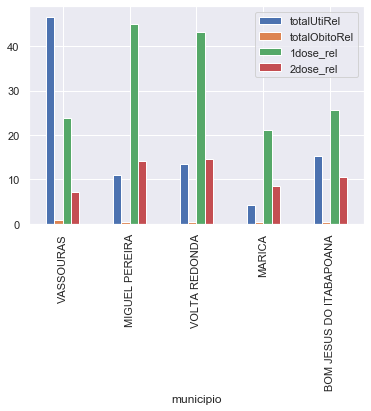

In [42]:
analise.head().plot(kind='bar')

In [43]:
analise = dfinal2
analise = analise.groupby(['municipio'])['totalUtiRel','totalObitoRel','1dose_rel','2dose_rel'].sum()
analise = analise.sort_values(by=['1dose_rel'], ascending = False)
analise

C:\Users\ethie\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,totalUtiRel,totalObitoRel,1dose_rel,2dose_rel
municipio,,,,
CARMO,0.105097,0.036784,58.197583,20.220704
CORDEIRO,4.890885,0.113425,46.091375,15.053763
RIO DE JANEIRO,3.427569,0.065028,45.520572,15.647687
MIGUEL PEREIRA,10.894805,0.422188,45.076424,14.244947
VOLTA REDONDA,13.437450,0.415347,43.163934,14.489686
ITAOCARA,4.422530,0.051675,42.636293,14.559469
NITEROI,2.743554,0.075099,42.584661,15.882263
VALENCA,9.242998,0.152207,40.552108,14.868152
AREAL,0.023680,0.023680,39.868972,14.334202


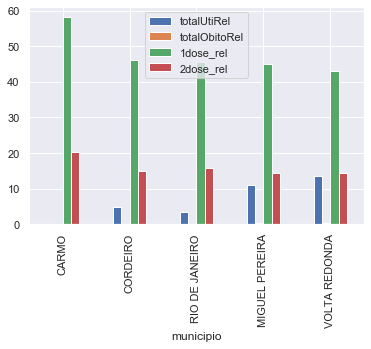

In [44]:
analise.head().plot(kind='bar')

In [45]:
analise = dfinal2
analise = analise.groupby(['municipio'])['totalUtiRel','totalObitoRel','1dose_rel','2dose_rel'].sum()
analise = analise.sort_values(by=['2dose_rel'], ascending = False)
analise

C:\Users\ethie\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,totalUtiRel,totalObitoRel,1dose_rel,2dose_rel
municipio,,,,
CARMO,0.105097,0.036784,58.197583,20.220704
NITEROI,2.743554,0.075099,42.584661,15.882263
CONCEICAO DE MACABU,3.483204,0.200872,39.187110,15.655184
RIO DE JANEIRO,3.427569,0.065028,45.520572,15.647687
CAMBUCI,1.895063,0.038675,34.601006,15.224958
CORDEIRO,4.890885,0.113425,46.091375,15.053763
VALENCA,9.242998,0.152207,40.552108,14.868152
ITAOCARA,4.422530,0.051675,42.636293,14.559469
APERIBE,0.042013,0.008403,37.139736,14.494580


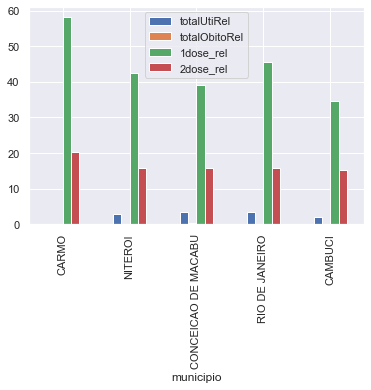

In [46]:
analise.head().plot(kind='bar')

In [47]:
# Exportando o dataframe final
dfinal2.to_csv('dfinalTCC.csv', encoding='iso-8859-1', index=False)

In [48]:
# ANÁLISE DAS CORRELAÇÕES #####################################################################################################

In [49]:
dfinal2['totalUti'].corr(dfinal2['populacao'])

0.9252016272238541

In [50]:
dfinal2['totalObitos'].corr(dfinal2['populacao'])

0.7825302591680262

In [51]:
dfinal2['totalUtiRel'].corr(dfinal2['densidadeDemo'])

-0.11734875775378263

In [52]:
dfinal2['totalObitoRel'].corr(dfinal2['densidadeDemo'])

-0.08986693641013896

In [53]:
dfinal2['totalUtiRel'].corr(dfinal2['IDHM'])

0.06802976458146211

In [54]:
dfinal2['totalObitoRel'].corr(dfinal2['IDHM'])

0.10783115108351003

In [55]:
dfinal2['totalUtiRel'].corr(dfinal2['PIB'])

-0.006874422724466453

In [56]:
dfinal2['totalObitoRel'].corr(dfinal2['PIB'])

0.09513687823040043

In [57]:
dfinal2['totalUtiRel'].corr(dfinal2['1doseA_rel'])

0.00924198733859632

In [58]:
dfinal2['totalUtiRel'].corr(dfinal2['2doseA_rel'])

-0.026997370128783876

In [59]:
dfinal2['totalObitoRel'].corr(dfinal2['1doseA_rel'])

-0.057760559514880565

In [60]:
dfinal2['totalObitoRel'].corr(dfinal2['2doseA_rel'])

-0.08383298614153942

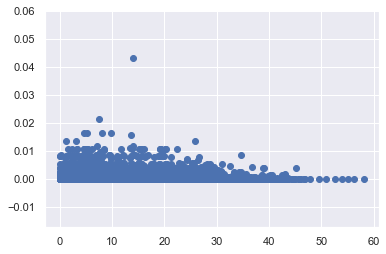

In [61]:
plt.scatter([dfinal2['1doseA_rel']],[dfinal.totalObitoRel])
plt.show() 

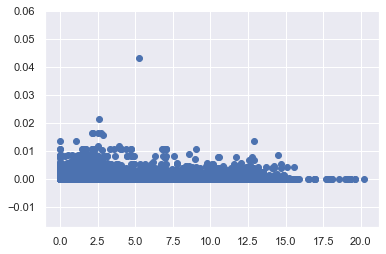

In [62]:
plt.scatter([dfinal2['2doseA_rel']],[dfinal.totalObitoRel])
plt.show() 

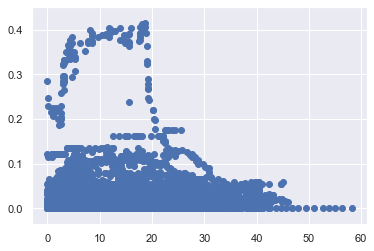

In [63]:
plt.scatter([dfinal2['1doseA_rel']],[dfinal.totalUtiRel])
plt.show() 

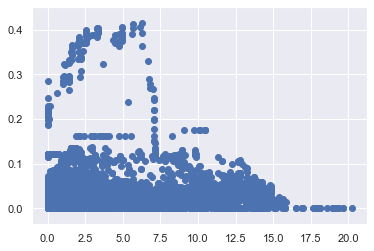

In [64]:
plt.scatter([dfinal2['2doseA_rel']],[dfinal.totalUtiRel])
plt.show() 

In [65]:
# MACHINE LEARNING ############################################################################################################

In [66]:
# totalObitoRel
y = dfinal2['totalObitoRel']
x = dfinal2[['IDHM','totalUtiRel','1doseA_rel']]

In [67]:
y

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
7520    0.000000
7521    0.000000
7522    0.000000
7523    0.000000
7524    0.000365
Name: totalObitoRel, Length: 7525, dtype: float64

In [68]:
x

,IDHM,totalUtiRel,1doseA_rel
0,0.724,0.020769,NaN
1,0.692,0.000000,NaN
2,0.718,0.010425,NaN
3,0.684,0.000000,NaN
4,0.728,0.000000,NaN
...,...,...,...
7520,0.730,0.011398,34.049066
7521,0.667,0.000000,31.926692
7522,0.725,0.036522,31.194760
7523,0.738,0.042930,NaN


In [69]:
x['1doseA_rel'] = x['1doseA_rel'].fillna(0)

C:\Users\ethie\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
x

,IDHM,totalUtiRel,1doseA_rel
0,0.724,0.020769,0.000000
1,0.692,0.000000,0.000000
2,0.718,0.010425,0.000000
3,0.684,0.000000,0.000000
4,0.728,0.000000,0.000000
...,...,...,...
7520,0.730,0.011398,34.049066
7521,0.667,0.000000,31.926692
7522,0.725,0.036522,31.194760
7523,0.738,0.042930,0.000000


In [71]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2,random_state=0)
print(dfinal2.shape, x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(7525, 21) (6020, 3) (1505, 3) (6020,) (1505,)


In [72]:
modelo = LinearRegression().fit(x_treino, y_treino)
resultado1 = modelo.score(x_treino, y_treino)
resultado2 = modelo.score(x_teste, y_teste)
print("Acurácia - base de treinamento:", resultado1)
print("Acurácia - base de teste:", resultado2)

Acurácia - base de treinamento: 0.22482882355632994
Acurácia - base de teste: 0.31767157013652403


In [73]:
y_teste[800:805]

4759    0.008377
6902    0.000000
4119    0.001104
5798    0.010787
532     0.000000
Name: totalObitoRel, dtype: float64

In [74]:
previsoes = modelo.predict(x_teste[800:805])
print(previsoes)

[0.00079211 0.00016851 0.00065711 0.00518871 0.00072944]


In [75]:
modelo = DecisionTreeRegressor(random_state=0)
modelo.fit(x_treino, y_treino)
resultado1 = modelo.score(x_treino, y_treino)
resultado2 = modelo.score(x_teste, y_teste)
print("Acurácia - base de treinamento:", resultado1)
print("Acurácia - base de teste:", resultado2)

Acurácia - base de treinamento: 0.8491976748127437
Acurácia - base de teste: -0.25262499119327875


In [76]:
y_teste[800:805]

4759    0.008377
6902    0.000000
4119    0.001104
5798    0.010787
532     0.000000
Name: totalObitoRel, dtype: float64

In [77]:
previsoes = modelo.predict(x_teste[800:805])
print(previsoes)

[1.43190880e-04 2.00368770e-05 0.00000000e+00 8.08996036e-03
 1.94673727e-04]


In [78]:
y = dfinal2['totalObitoRel']
x = dfinal2[['IDHM','totalUtiRel','2doseA_rel']]
x['2doseA_rel'] = x['2doseA_rel'].fillna(0)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2,random_state=0)

C:\Users\ethie\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
modelo = LinearRegression().fit(x_treino, y_treino)
resultado1 = modelo.score(x_treino, y_treino)
resultado2 = modelo.score(x_teste, y_teste)
print("Acurácia - base de treinamento:", resultado1)
print("Acurácia - base de teste:", resultado2)

Acurácia - base de treinamento: 0.22547107024695778
Acurácia - base de teste: 0.31800177510471517


In [80]:
y_teste[800:805]

4759    0.008377
6902    0.000000
4119    0.001104
5798    0.010787
532     0.000000
Name: totalObitoRel, dtype: float64

In [81]:
previsoes = modelo.predict(x_teste[800:805])
print(previsoes)

[0.00082243 0.00016723 0.00062292 0.00519395 0.00074336]


In [82]:
modelo = DecisionTreeRegressor(random_state=0)
modelo.fit(x_treino, y_treino)
resultado1 = modelo.score(x_treino, y_treino)
resultado2 = modelo.score(x_teste, y_teste)
print("Acurácia - base de treinamento:", resultado1)
print("Acurácia - base de teste:", resultado2)

Acurácia - base de treinamento: 0.813591489205561
Acurácia - base de teste: -0.24831943842281892


In [83]:
y_teste[800:805]

4759    0.008377
6902    0.000000
4119    0.001104
5798    0.010787
532     0.000000
Name: totalObitoRel, dtype: float64

In [84]:
previsoes = modelo.predict(x_teste[800:805])
print(previsoes)

[0.00016109 0.0001549  0.         0.00808996 0.        ]


In [85]:
y = dfinal2['totalObitoRel']
x = dfinal2[['IDHM','totalUtiRel','1doseA_rel','2doseA_rel']]
x['1doseA_rel'] = x['1doseA_rel'].fillna(0)
x['2doseA_rel'] = x['2doseA_rel'].fillna(0)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2,random_state=0)

C:\Users\ethie\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ethie\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [86]:
modelo = LinearRegression().fit(x_treino, y_treino)
resultado1 = modelo.score(x_treino, y_treino)
resultado2 = modelo.score(x_teste, y_teste)
print("Acurácia - base de treinamento:", resultado1)
print("Acurácia - base de teste:", resultado2)

Acurácia - base de treinamento: 0.22563460517247866
Acurácia - base de teste: 0.3175314976547703


In [87]:
y_teste[800:805]

4759    0.008377
6902    0.000000
4119    0.001104
5798    0.010787
532     0.000000
Name: totalObitoRel, dtype: float64

In [88]:
previsoes = modelo.predict(x_teste[800:805])
print(previsoes)

[0.00084327 0.00018192 0.00060261 0.00520798 0.00074567]


In [89]:
modelo = DecisionTreeRegressor(random_state=0)
modelo.fit(x_treino, y_treino)
resultado1 = modelo.score(x_treino, y_treino)
resultado2 = modelo.score(x_teste, y_teste)
print("Acurácia - base de treinamento:", resultado1)
print("Acurácia - base de teste:", resultado2)

Acurácia - base de treinamento: 0.8667016107474655
Acurácia - base de teste: -0.19976017793864775


In [90]:
y_teste[800:805]

4759    0.008377
6902    0.000000
4119    0.001104
5798    0.010787
532     0.000000
Name: totalObitoRel, dtype: float64

In [91]:
previsoes = modelo.predict(x_teste[800:805])
print(previsoes)

[0.00020445 0.0001549  0.         0.00808996 0.00019467]


In [92]:
y = dfinal2['totalObitoRel']
x = dfinal2[['totalUtiRel','1doseA_rel','2doseA_rel']]
x['1doseA_rel'] = x['1doseA_rel'].fillna(0)
x['2doseA_rel'] = x['2doseA_rel'].fillna(0)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2,random_state=0)

C:\Users\ethie\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ethie\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [93]:
modelo = LinearRegression().fit(x_treino, y_treino)
resultado1 = modelo.score(x_treino, y_treino)
resultado2 = modelo.score(x_teste, y_teste)
print("Acurácia - base de treinamento:", resultado1)
print("Acurácia - base de teste:", resultado2)

Acurácia - base de treinamento: 0.2209014662709311
Acurácia - base de teste: 0.30500540955395505


In [94]:
modelo = DecisionTreeRegressor(random_state=0)
modelo.fit(x_treino, y_treino)
resultado1 = modelo.score(x_treino, y_treino)
resultado2 = modelo.score(x_teste, y_teste)
print("Acurácia - base de treinamento:", resultado1)
print("Acurácia - base de teste:", resultado2)

Acurácia - base de treinamento: 0.865164962348194
Acurácia - base de teste: -0.23240640480296593


In [95]:
# totalUtiRel
y = dfinal2['totalUtiRel']
x = dfinal2[['IDHM','totalObitoRel','1doseA_rel']]
x['1doseA_rel'] = x['1doseA_rel'].fillna(0)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2,random_state=0)

C:\Users\ethie\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [96]:
modelo = LinearRegression().fit(x_treino, y_treino)
resultado1 = modelo.score(x_treino, y_treino)
resultado2 = modelo.score(x_teste, y_teste)
print("Acurácia - base de treinamento:", resultado1)
print("Acurácia - base de teste:", resultado2)

Acurácia - base de treinamento: 0.2188931446015573
Acurácia - base de teste: 0.2889678184372868


In [97]:
modelo = DecisionTreeRegressor(random_state=0)
modelo.fit(x_treino, y_treino)
resultado1 = modelo.score(x_treino, y_treino)
resultado2 = modelo.score(x_teste, y_teste)
print("Acurácia - base de treinamento:", resultado1)
print("Acurácia - base de teste:", resultado2)

Acurácia - base de treinamento: 0.975276316768214
Acurácia - base de teste: 0.8473949351263736


In [98]:
y = dfinal2['totalUtiRel']
x = dfinal2[['IDHM','totalObitoRel','2doseA_rel']]
x['2doseA_rel'] = x['2doseA_rel'].fillna(0)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2,random_state=0)

C:\Users\ethie\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
modelo = LinearRegression().fit(x_treino, y_treino)
resultado1 = modelo.score(x_treino, y_treino)
resultado2 = modelo.score(x_teste, y_teste)
print("Acurácia - base de treinamento:", resultado1)
print("Acurácia - base de teste:", resultado2)

Acurácia - base de treinamento: 0.218109854103651
Acurácia - base de teste: 0.2876111513649838


In [100]:
modelo = DecisionTreeRegressor(random_state=0)
modelo.fit(x_treino, y_treino)
resultado1 = modelo.score(x_treino, y_treino)
resultado2 = modelo.score(x_teste, y_teste)
print("Acurácia - base de treinamento:", resultado1)
print("Acurácia - base de teste:", resultado2)

Acurácia - base de treinamento: 0.9724042678007275
Acurácia - base de teste: 0.900517034361907


In [101]:
y = dfinal2['totalUtiRel']
x = dfinal2[['IDHM','totalObitoRel','1doseA_rel','2doseA_rel']]
x['1doseA_rel'] = x['1doseA_rel'].fillna(0)
x['2doseA_rel'] = x['2doseA_rel'].fillna(0)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2,random_state=0)

C:\Users\ethie\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ethie\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [102]:
modelo = LinearRegression().fit(x_treino, y_treino)
resultado1 = modelo.score(x_treino, y_treino)
resultado2 = modelo.score(x_teste, y_teste)
print("Acurácia - base de treinamento:", resultado1)
print("Acurácia - base de teste:", resultado2)

Acurácia - base de treinamento: 0.22341244749893086
Acurácia - base de teste: 0.29304173522734356


In [103]:
modelo = DecisionTreeRegressor(random_state=0)
modelo.fit(x_treino, y_treino)
resultado1 = modelo.score(x_treino, y_treino)
resultado2 = modelo.score(x_teste, y_teste)
print("Acurácia - base de treinamento:", resultado1)
print("Acurácia - base de teste:", resultado2)

Acurácia - base de treinamento: 0.9754733835882701
Acurácia - base de teste: 0.8881094157467007


In [104]:
y = dfinal2['totalUtiRel']
x = dfinal2[['totalObitoRel','1doseA_rel','2doseA_rel']]
x['1doseA_rel'] = x['1doseA_rel'].fillna(0)
x['2doseA_rel'] = x['2doseA_rel'].fillna(0)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2,random_state=0)

C:\Users\ethie\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ethie\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [105]:
modelo = LinearRegression().fit(x_treino, y_treino)
resultado1 = modelo.score(x_treino, y_treino)
resultado2 = modelo.score(x_teste, y_teste)
print("Acurácia - base de treinamento:", resultado1)
print("Acurácia - base de teste:", resultado2)

Acurácia - base de treinamento: 0.22325837637313603
Acurácia - base de teste: 0.29382559662756835


In [106]:
modelo = DecisionTreeRegressor(random_state=0)
modelo.fit(x_treino, y_treino)
resultado1 = modelo.score(x_treino, y_treino)
resultado2 = modelo.score(x_teste, y_teste)
print("Acurácia - base de treinamento:", resultado1)
print("Acurácia - base de teste:", resultado2)

Acurácia - base de treinamento: 0.9349328255098677
Acurácia - base de teste: 0.6272443464732629


In [107]:
y_teste[800:805]

4759    0.015465
6902    0.000000
4119    0.025391
5798    0.288542
532     0.021369
Name: totalUtiRel, dtype: float64

In [108]:
yreal = y_teste[800:805]

In [109]:
previsoes = modelo.predict(x_teste[800:805])
print(previsoes)

[0.02136935 0.         0.02097524 0.26966535 0.01304071]


In [110]:
rmse = sqrt(mean_squared_error(yreal, previsoes))
rmse

0.009798538974191993